In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# **Step 2: Data Preprocessing & Visualization**

# 1. Load the CSV file in Python (Pandas, NumPy).

In [28]:
# Step 1: Load the CSV
df = pd.read_csv("weather_data.csv")  # Make sure the path matches your file

# 2. Plot temperature and humidity distributions.

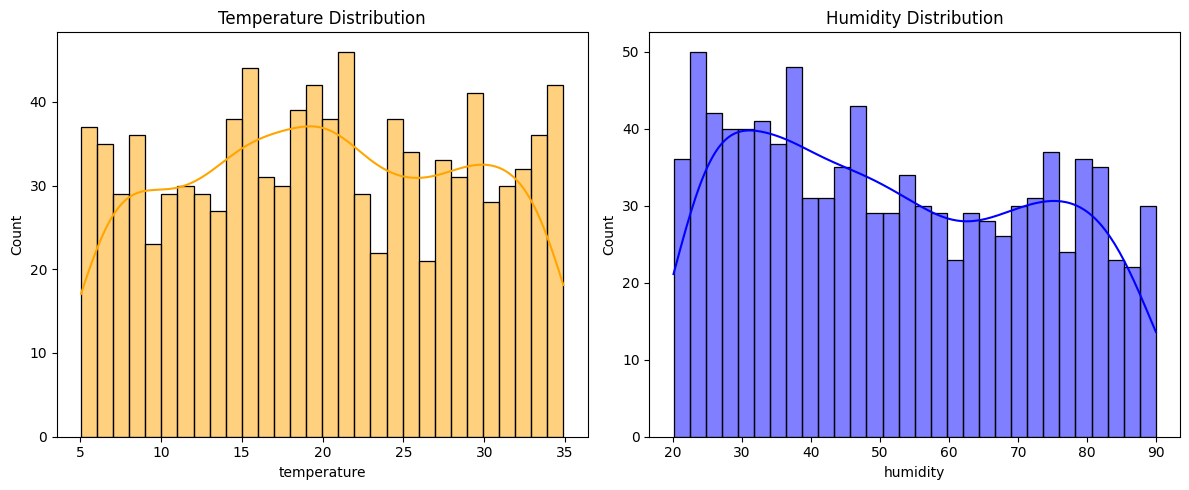

In [29]:
# Step 2: Plot temperature and humidity distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["temperature"], kde=True, bins=30, color="orange")
plt.title("Temperature Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["humidity"], kde=True, bins=30, color="blue")
plt.title("Humidity Distribution")

plt.tight_layout()
plt.show()

# 3. Apply feature scaling and normalization.

In [30]:
# Step 3: Feature scaling and normalization
features = df[["temperature", "humidity"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert labels to numeric
labels = df["label"].apply(lambda x: 1 if x == "Sunny" else 0).values

# 4. Split data into training and testing sets.

In [31]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, labels, test_size=0.2, random_state=42, stratify=labels
)

# **Step 3: Model Training**

# 1. Train a Neural Network classifier in TensorFlow/Keras.

In [32]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Two input features: temperature & humidity
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5663 - loss: 0.6769 - val_accuracy: 0.8875 - val_loss: 0.5091
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.4503 - val_accuracy: 1.0000 - val_loss: 0.3199
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2630 - val_accuracy: 1.0000 - val_loss: 0.1954
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1606 - val_accuracy: 1.0000 - val_loss: 0.1271
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1009 - val_accuracy: 1.0000 - val_loss: 0.0876
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0670 - val_accuracy: 1.0000 - val_loss: 0.0633
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 0.0491
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss:

# 3. Evaluate model performance using accuracy, confusion matrix.

In [34]:
# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test Accuracy: 1.00


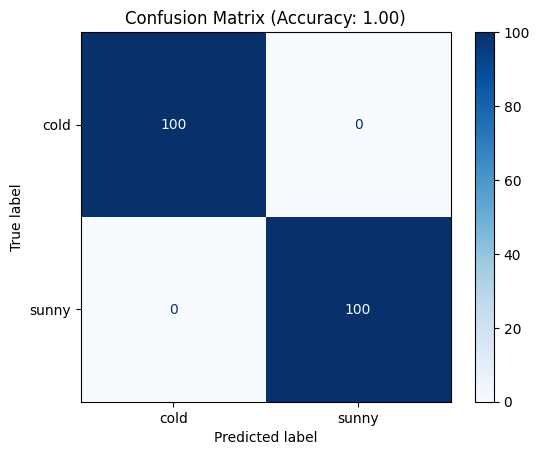

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["cold", "sunny"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# 1. Convert the trained model to TFLite (quantized for ESP32).

In [36]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open("environment_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted and saved as 'environment_model.tflite'")


Saved artifact at '/tmp/tmpuot0vlfj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139039984301840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039984299536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039984290704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039984303184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039984301648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039984298576: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully converted and saved as 'environment_model.tflite'
